<a href="https://colab.research.google.com/github/anirudh-bukka/DataAnalysis-SupervisedML/blob/main/WeatherData_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Ojas ML/Material/WeatherData.csv")

In [4]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


### Convert `Date/Time`'s datatype

In [ ]:
df['Date/Time'] = df['Date/Time'].str.replace('/', '')
df['Date/Time'] = df['Date/Time'].str.replace(':', '')
df['Date/Time'] = df['Date/Time'].str.replace(' ', '')
df['Date/Time'] = df['Date/Time'].astype(float)

### Split data into target variables and indepedent variables

In [ ]:
X = df.iloc[:, :-1].values # Independent variables
y = df.iloc[:, -1].values # Target variable

## Splitting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
print(X_train)

[[ 1.24201211e+10  1.01000000e+01  7.70000000e+00 ...  1.70000000e+01
   2.41000000e+01  1.01060000e+02]
 [ 1.92012500e+08 -8.40000000e+00 -1.27000000e+01 ...  1.10000000e+01
   2.50000000e+01  1.01930000e+02]
 [ 1.16201230e+09 -5.50000000e+00 -8.90000000e+00 ...  4.00000000e+00
   2.50000000e+01  1.01760000e+02]
 ...
 [ 2.72012170e+09 -5.90000000e+00 -1.76000000e+01 ...  1.90000000e+01
   4.83000000e+01  1.01940000e+02]
 [ 8.42012800e+08  2.31000000e+01  1.56000000e+01 ...  1.30000000e+01
   4.83000000e+01  1.01750000e+02]
 [ 1.10201219e+10 -5.70000000e+00 -1.38000000e+01 ...  1.50000000e+01
   2.50000000e+01  1.01150000e+02]]


In [ ]:
print(X_test)

[[ 9.18201215e+10  1.81000000e+01  1.70000000e+01 ...  3.20000000e+01
   2.41000000e+01  9.92800000e+01]
 [ 2.11201221e+10 -1.39000000e+01 -1.86000000e+01 ...  7.00000000e+00
   2.50000000e+01  1.00710000e+02]
 [ 1.22620121e+11 -1.13000000e+01 -1.45000000e+01 ...  2.00000000e+01
   4.83000000e+01  1.02500000e+02]
 ...
 [ 7.15201220e+09  2.45000000e+01  1.89000000e+01 ...  9.00000000e+00
   2.50000000e+01  1.01280000e+02]
 [ 5.30201210e+10  2.15000000e+01  1.02000000e+01 ...  1.50000000e+01
   4.83000000e+01  1.00100000e+02]
 [ 5.29201250e+09  1.10000000e+01  8.90000000e+00 ...  1.50000000e+01
   1.29000000e+01  1.00140000e+02]]


In [ ]:
print(y_train)

['Cloudy' 'Cloudy' 'Clear' ... 'Clear' 'Mainly Clear' 'Mostly Cloudy']


In [ ]:
print(y_test)

['Rain' 'Clear' 'Mainly Clear' ... 'Mainly Clear' 'Mainly Clear'
 'Thunderstorms,Rain Showers']


In [ ]:
df['Date/Time'].dtype

dtype('float64')

## Scaling Features

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# fit and transform the train data
X_train = sc.fit_transform(X_train)

# transform the test data
X_test = sc.transform(X_test)

## Decision Tree

Method 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_predict = classifier.predict(X_test)
print(y_predict)

['Mostly Cloudy' 'Clear' 'Mainly Clear' ... 'Clear' 'Clear' 'Rain']


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.47306525037936265

[Text(0.1764127929187163, 0.9807692307692307, 'X[5] <= -1.362\nentropy = 2.919\nsamples = 6148\nvalue = [944, 1240, 32, 51, 1, 1, 11, 99, 7, 6, 2, 9, 3\n9, 3, 1, 1, 9, 1484, 1, 4, 2, 1404, 196, 126\n1, 85, 1, 1, 12, 1, 1, 2, 285, 1, 43, 2, 9\n28, 3, 6, 2, 1, 1, 3, 13, 1]'),
 Text(0.04401898116521909, 0.9423076923076923, 'X[2] <= -0.268\nentropy = 3.501\nsamples = 555\nvalue = [0, 0, 2, 51, 1, 1, 11, 99, 5, 6, 2, 8, 3, 7\n3, 1, 1, 9, 0, 1, 4, 2, 0, 19, 4, 0, 85, 1\n1, 7, 0, 1, 2, 158, 1, 5, 2, 9, 28, 3, 5, 0\n1, 1, 0, 4, 1]'),
 Text(0.02304942910120035, 0.9038461538461539, 'X[4] <= 0.122\nentropy = 2.853\nsamples = 282\nvalue = [0, 0, 0, 3, 1, 0, 0, 36, 5, 6, 2, 8, 2, 7\n3, 1, 1, 7, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0\n1, 3, 0, 0, 0, 145, 1, 5, 2, 9, 20, 3, 5, 0\n0, 0, 0, 0, 0]'),
 Text(0.011881526300380599, 0.8653846153846154, 'X[3] <= 1.006\nentropy = 2.86\nsamples = 115\nvalue = [0, 0, 0, 0, 0, 0, 0, 35, 3, 3, 2, 3, 2, 3\n1, 1, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 1, 0, 0, 0, 38, 0, 4, 1,

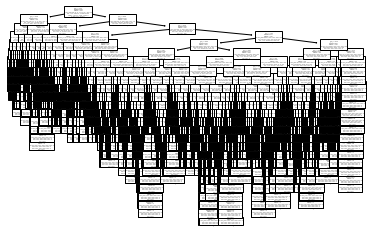

In [ ]:
from sklearn import tree
tree.plot_tree(classifier)

Method 2

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model

DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.4613050075872534

In [ ]:
# tree.plot_tree(model)

In [ ]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
clf.predict(X_test)

array(['Mostly Cloudy', 'Mostly Cloudy', 'Mainly Clear', ...,
       'Mainly Clear', 'Mostly Cloudy', 'Rain,Fog'], dtype=object)

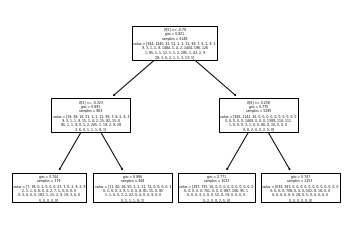

In [ ]:
tree.plot_tree(clf);